<a href="https://colab.research.google.com/github/acoxonante/sos/blob/main/20211225_BTC_transaction_degree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20211226 Code related to the treatment of Bitcoin blockchain

In [4]:
import urllib
import os.path
import requests
import json
import datetime 

# right directory
cwd= os.getcwd()
destdir = "outcome" 
completeNamed = os.path.join(cwd, destdir)

if not os.path.exists(destdir):
	os.mkdir(destdir)
else:
	pass

first_block_number = input('Number of initial block to get txs from blockchain.info? [by default 500700]:') or "500700"
last_block_number = input('Number of last block to get txs from blockchain.info? [by default 500703]:') or "500703"
ifirst_block_number = int(first_block_number)
ilast_block_number = int(last_block_number)

block_number = ilast_block_number - ifirst_block_number 
block_counter =  ifirst_block_number 

# preparing the first output file - the entire transaction
# preparing the first output file - the to and from included in the transaction json file
#outputfile2 = "json" + "txidsintheblocks.txt"

outputfile2 = "block-" + first_block_number +"-"+ last_block_number + "-blockchain-info-transactions-hashes.txt"
completeNamed = os.path.join(cwd, destdir)
outputfile2c = os.path.join(completeNamed, outputfile2)

outputfiletime = "BTC-block-" + first_block_number +"-"+ last_block_number + "-blockchain-info-time.txt"
completeNamed = os.path.join(cwd, destdir)
outputfiletimec = os.path.join(completeNamed, outputfiletime)


while (block_counter<=ilast_block_number): 

	y_block_number = str(block_counter)
	outputfile = y_block_number + "-json" + "-block.txt" 
	completeNamed = os.path.join(cwd, destdir)
	outputfilec = os.path.join(completeNamed, outputfile)

	outputfilet = y_block_number + "-transactions" + "-block.txt" 
	completeNamed = os.path.join(cwd, destdir)
	outputfiletc = os.path.join(completeNamed, outputfilet)

	params = (('format', 'json'),)
	response = requests.get("https://blockchain.info/block-height/" +y_block_number, params=params)

	jsonresponse = response.json()

	# writing to an output file the entire json structure receiving from posting
	with open(outputfilec, 'w') as the_resultfile:
		json.dump(jsonresponse, the_resultfile)
	

# writing to a second output file the to and the from fields
	with open(outputfilec, "r") as read_file:
		datau = json.load(read_file)
#	#data = byteify(datau)
	#print(datau.keys())
		with open(outputfiletimec, 'a') as timefile:		
			timefile.write("time of block: ") 
			timefile.write("\n")  
			timefile.write(str(datau["blocks"][0]["time"])) 					
			timefile.write("\n") 
			timestamp = datetime.datetime.fromtimestamp(datau["blocks"][0]["time"]) 
			timefile.write(timestamp.strftime('%Y-%m-%d %H:%M:%S')) 
			timefile.write("\n")

		with open(outputfiletc, 'a') as the_resultfile2:		

			print("number of blocks") 
			print(len(datau["blocks"]))
			print("number of transactions") 
			print(len(datau["blocks"][0]["tx"]))
			for i in range(len(datau["blocks"][0]["tx"])):
				inputprinted=False
				outprinted=False
				if (datau["blocks"][0]["tx"][i]).get('inputs',None) !=None or (datau["blocks"][0]["tx"][i]).get('out',None) !=None:
					for j in range(len(datau["blocks"][0]["tx"][i]["inputs"])):			
						
						if (datau["blocks"][0]["tx"][i]["inputs"][j]).get('prev_out',None) !=None:
						
							if not inputprinted:
								the_resultfile2.write("input\n")
								inputprinted=True
								the_resultfile2.write((datau["blocks"][0]["tx"][i]["inputs"][j]["prev_out"]).get('addr','')+"\n")	
							else:
								if (datau["blocks"][0]["tx"][i]["inputs"][j]).get('addr',None) !=None:	
									the_resultfile2.write((datau["blocks"][0]["tx"][i]["inputs"][j]["prev_out"]["addr"])+"\n") 
								else: 
									the_resultfile2.write("noinput\n") 
						else:
							print("no inputs")
							the_resultfile2.write("noinput\n")
					for k in range(len(datau["blocks"][0]["tx"][i]["out"])):			
						if (datau["blocks"][0]["tx"][i]["out"][k]).get('addr',None) != None:
							if not outprinted:						
								the_resultfile2.write("out\n")
								outprinted=True
								the_resultfile2.write((datau["blocks"][0]["tx"][i]["out"][k]).get('addr',None)+"\n")
							else:
								if (datau["blocks"][0]["tx"][i]["out"][k]).get('addr',None) !=None:						
									the_resultfile2.write((datau["blocks"][0]["tx"][i]["out"][k]["addr"])+"\n")
								else: 
									the_resultfile2.write("nooutput\n")                        					
						else:
							print("no output")
							the_resultfile2.write("nooutput\n")
				else:
					print("empty tx")	
					
		

	block_counter +=1
	

Number of initial block to get txs from blockchain.info? [by default 500700]:500700
Number of last block to get txs from blockchain.info? [by default 500703]:500701
number of blocks
1
number of transactions
2522
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
no output
number of blocks
1
number of transactions
2614
no output
no output
n

Now we introduce the second part

In [17]:
# fourth piece of code - this time devoted to marshall properly the addresses involved in transactions 
# step 3.1 handle properly the addresses


def create_matrix2(matrixina,matrixinb,matrixoua,matrixoub,inputfile,outfile5):
	inputline=matrixina
	outline=matrixoua
	with open(outfile5, 'a') as outfile:
		while (inputline <= matrixinb):					
			while (outline <= matrixoub):
				str = helplines[inputline-1]
				str2 = str.strip("\n")						
				outfile.write("(")
				outfile.write(str2)						
				outfile.write(",")	
				stra = helplines[outline-1]
				stra2 = stra.strip("\n")						
				outfile.write(stra2)
				outfile3.write("outlinetowrite:") 
				outfile3.write('%d' % outline)
				outfile3.write("\n")
				outfile.write(")")
				outfile.write("\n")
				outfile3.write("inputlinetowrite:") 
				outfile3.write('%d' % inputline)
				outfile3.write("\n")
				outline = outline + 1
			inputline = inputline +1
		
def create_matrix(matrixina,matrixinb,matrixoua,matrixoub,inputfile,outfile5):
	rangein= matrixinb-matrixina+1
	rangeou= matrixoub-matrixoua+1
	with open(outfile5, 'a') as outfile:
		for inputlinetowrite in (matrixina, rangein):			
			for outlinetowrite in (matrixoua, rangeou):
				str = inputfile[inputlinetowrite]
				str2 = str.strip("\n")						
				outfile.write("(")
				outfile.write(str2)						
				outfile.write(",")	
				stra = inputfile[outlinetowrite]
				stra2 = stra.strip("\n")						
				outfile.write(stra2)
				outfile.write(")")
				outfile.write("\n")
				
def printallcounters(matrixina,matrixinb,matrixoua,matrixoub, counterfilename):
		with open(counterfilename, 'a') as outfile4:
			outfile4.write("firstinput:") 
			outfile4.write('%d' % matrixina)
			outfile4.write("\n")			
			outfile4.write("lastinput:") 
			outfile4.write('%d' % matrixinb)
			outfile4.write("\n")			
			outfile4.write("firstoutput:") 
			outfile4.write('%d' % matrixoua)
			outfile4.write("\n")	
			outfile4.write("lastoutput:") 
			outfile4.write('%d' % matrixoub)
			outfile4.write("\n")	
		
def file_len(fname):
		with open(fname) as f:
				for i,l in enumerate(f):
						pass
		return i + 1

import datetime
import os.path


first_block_number = input('Number of initial block? [by default 500700]:') or "500700"
last_block_number = input('Number of last block file? [by default 500703]:') or "500703"
ifirst_block_number = int(first_block_number)
ilast_block_number = int(last_block_number)
block_number = ilast_block_number - ifirst_block_number 
block_counter =  ifirst_block_number 

cwd= os.getcwd()
destdir = "outcome"
completeNamed = os.path.join(cwd, destdir)


while (block_counter<=ilast_block_number):
	x_block_number = str(block_counter)
	now = datetime.datetime.now()
	firstinput = 0
	firstinput2 = 0
	lastinput = 0
	firstout = 0
	lastout = 0
	firstinputfound = False
	firstinputround1 = False
	firstinputround2 = False
	firstoutfound = False
	firstoutround = False
	counter = 0
	counter2 = 0

	#x_block_number = raw_input('Number of block from which to create the marshalled file?[by default 500700]:') or "500700"

	#input_file = "block-" + x_block_number + "-transactions-analysis-step1e.txt"
	input_file = x_block_number + "-transactions" + "-block.txt"
	output_file_1 = "block-" + x_block_number + "-transactions-analysis-step2a.txt"
	output_file_2 = "block-" + x_block_number + "-transactions-analysis-step2b.txt"
	output_file_3 = "block-" + x_block_number + "-transactions-analysis-step2c.txt"
	output_file_4 = "block-" + x_block_number + "-transactions-analysis-step2d.txt"
	output_file_5 = "block-" + x_block_number + "-transactions-analysis-step2e.txt"

	

	input_filec = os.path.join(completeNamed, input_file)
	output_file_1c = os.path.join(completeNamed, output_file_1)  
	output_file_2c = os.path.join(completeNamed, output_file_2)  
	output_file_3c = os.path.join(completeNamed, output_file_3)  
	output_file_4c = os.path.join(completeNamed, output_file_4)  
	output_file_5c = os.path.join(completeNamed, output_file_5)  

	
	if os.path.getsize(input_filec) == 0:
		print("The file " + input_filec + " is empty. No transactions")
	else:
		filelines = file_len(input_filec)
		g = open(input_filec, 'r')
		helplines = g.readlines() #lines is a list of strings 
		g.close()
		a= open(output_file_4c,"w")
		a.close()
		b= open(output_file_5c,"w")
		b.close()
		with open(output_file_1c, 'w') as outfile1:
			with open(output_file_2c, 'w') as outfile2:
				outfile2.write("nr lines:") 
				outfile2.write('%d' % filelines)
				outfile2.write("\n")
				with open(output_file_3c, 'w') as outfile3:
					for eachline in helplines:
						counter2 = counter2+1		
						outfile2.write("counter2:") 
						outfile2.write('%d' % counter2)
						outfile2.write("  ")
						outfile2.write(eachline)
						if ((eachline[0:5] == "input") and (firstinputround1 == False) and (firstinputround2 == False)):			
							firstinput = counter2+1 		#this counter works OK
							firstinputround1 = True
							outfile2.write("firstinput first if:") 
							outfile2.write('%d' % firstinput)
							outfile2.write("\n")
						elif (eachline[0:3] == "out"):				
							lastinput = counter2-1			#this counter works OK
							inputrange= lastinput-firstinput+1
							firstout = counter2+1			#this counter works OK
							outfile2.write("lastinput outif:") 
							outfile2.write('%d' % lastinput)
							outfile2.write("\n")			
							outfile2.write("inputrange:") 
							outfile2.write('%d' % inputrange)
							outfile2.write("\n")			
							outfile2.write("firstout outif:") 
							outfile2.write('%d' % firstout)
							outfile2.write("\n")
						elif ((eachline[0:5] == "input") and firstinputround1 and (firstinputround2==False)): 
#you have reached all the input required for the first transaction - all counters are fixed when reaching last out				
							lastout = counter2-1			#this counter works OK
							outrange= lastout-firstout+1
							printallcounters(firstinput,lastinput,firstout,lastout, output_file_4c )
							create_matrix2(firstinput,lastinput,firstout,lastout,helplines,output_file_5c)
							inputline=firstinput
							outline=firstout
							while (inputline <= lastinput):					
								while (outline <= lastout):
									str1 = helplines[inputline-1]
									str2 = str1.strip("\n")						
									#outfile1.write("reaching file 1 writing")
									outfile1.write("(")
									outfile1.write(str2)						
									outfile1.write(",")	
									stra = helplines[outline-1]
									stra2 = stra.strip("\n")						
									outfile1.write(stra2)
									outfile3.write("outlinetowrite:") 
									outfile3.write('%d' % outline)
									outfile3.write("\n")
									outfile1.write(")")
									outfile1.write("\n")
									outfile3.write("inputlinetowrite:") 
									outfile3.write('%d' % inputline)
									outfile3.write("\n")
									outline = outline + 1
								inputline = inputline +1
							firstinput = counter2+1
							outfile2.write("lastout secondif:")
							outfile2.write('%d' % lastout)
							outfile2.write("\n")	
							outfile2.write("outrange secondif:") 
							outfile2.write('%d' % lastout)
							outfile2.write('%d' % firstout)
							outfile2.write('%d' % outrange)
							outfile2.write("\n")
							outfile2.write("firstinput secondif:")
							outfile2.write('%d' % firstinput)
							outfile2.write("\n")
							firstinputround2 = False

						elif counter2 == filelines:
							lastout = counter2					#this counter works OK
							printallcounters(firstinput,lastinput,firstout,lastout, output_file_4c )
							create_matrix2(firstinput,lastinput,firstout,lastout,helplines,output_file_5c)
							inputline=firstinput
							outline=firstout
							while (inputline <= lastinput):					
								while (outline <= lastout):
									str1 = helplines[inputline-1]
									str2 = str1.strip("\n")						
								#outfile1.write("reaching file 1 writing")
									outfile1.write("(")
									outfile1.write(str2)						
									outfile1.write(",")	
									stra = helplines[outline-1]
									stra2 = stra.strip("\n")						
									outfile1.write(stra2)
									outfile3.write("outlinetowrite:") 
									outfile3.write('%d' % outline)
									outfile3.write("\n")
									outfile1.write(")")
									outfile1.write("\n")
									outfile3.write("inputlinetowrite:") 
									outfile3.write('%d' % inputline)
									outfile3.write("\n")
									outline = outline + 1
								inputline = inputline +1
# begin extract 2 but it was commented
# end extract 2

	block_counter = block_counter+1

Number of initial block? [by default 500700]:500700
Number of last block file? [by default 500703]:500701


Now we introduce the third element of Bitcoin into this code


In [19]:
import os.path
#import networkx as nx
#import matplotlib.pyplot as plt


def should_remove_line(line, stop_words):
    return any([word in line for word in stop_words])
stop_words = [",nooutput)", "(,"]


first_block_number = input('Number of initial block? [by default 500700]:') or "500700"
last_block_number = input('Number of last block file? [by default 500703]:') or "500703"
ifirst_block_number = int(first_block_number)
ilast_block_number = int(last_block_number)

block_counter =  ifirst_block_number 

cwd= os.getcwd()
destdir = "outcome" 
completeNamed = os.path.join(cwd, destdir)

output_file= "block-" + first_block_number +"-"+ last_block_number + "-transaction-history.txt"
output_filec = os.path.join(completeNamed, output_file)

while (block_counter<=ilast_block_number): 

	x_block_number = str(block_counter)
	#x_block_number = raw_input('Number of block from which to prepare the format for the network?[by default 524438]:') or "524438"
	input_file= "block-" + x_block_number + "-transactions-analysis-step2e.txt"
	input_filec = os.path.join(completeNamed, input_file)
	#output_filec = open(input_filec, 'a') 
	if not os.path.isfile(input_filec):
		print("The file " + input_filec + " is empty. No transactions")
	else:
		with open(input_filec, 'r') as infile, open(output_filec, 'a') as outfile:		
			for line in infile:   
   				if not should_remove_line(line, stop_words):  
       					outfile.write(line)    




		


	block_counter = block_counter+1


input_file = "block-" + first_block_number +"-"+ last_block_number + "-transaction-history.txt"
input_filec = os.path.join(completeNamed, input_file)
output_file_1= "block-" + first_block_number +"-"+ last_block_number + "-transaction-history-to-analyse.txt"
output_file_1c = os.path.join(completeNamed, output_file_1)

if not os.path.isfile(input_filec):
	print("The file " + input_filec + " is empty. No transactions")
else:	
	with open(output_filec, 'r') as infile, open(output_file_1c, 'w') as outfile:
		data = infile.read()
		data = data.replace("(","")     
		data = data.replace(")","")
		data = data.replace(","," ")	
		#data = data.replace("\n", ",\n")
		outfile.write(data)



Number of initial block? [by default 500700]:
Number of last block file? [by default 500703]:500701


And now I introduce the last part of Bitcoin treatment code

Name of the file containing the dataset: by default block-629000-629002-transaction-history-to-analyse.txtblock-500700-500701-transaction-history-to-analyse.txt
BTC or ETH? [by default BTC]:BTC
Number of initial block? [by default 629000]:500700
Number of last block file? [by default 629002]:500701
network info
Graph named 'BTC-block-500700-500701-Tx-network' with 16200 nodes and 13019 edges
number of nodes 
16200
number of edges 
13019
is directed? 
False
degree per node 
[('16wzX97DXhdY38QfYfEL1S2DeaWa6GdS4H', 1), ('3R1uxqYyEaTBsu1AYMFan7Td7PNtnQCMfB', 1), ('1B9uLVaZJ4sfmwLHbzvUqrdewkEA85utTW', 2), ('1BHfYtjGC8Djx595m8a7SXpBJn3Jb8JpGN', 1), ('1L4ZkDj3SVx7zyoAH6QVJ9F67bsMZHeP4R', 2), ('17uAgVfD4aGf2HNFwWGKgtTsMTVEhA2ebn', 2), ('19T5oGuxm11HpM25YPunxQYosM7MQuWShW', 1), ('3Qpde6HcYpr8BwFnthqZA2vne9RP5ZfBjw', 3), ('3KmA7GgEsiYnE7pGQsQhfzcCmFDibo4bQj', 1), ('1AVuiCpsaQuaXwqqg1X7W5agWdKaLaTYLa', 2), ('1LK6xGqofkARCkSpb8QeaCAnQErhDvNo9U', 1), ('335K8TYtZx25nXokNWvcy7bzmoX9u49gUX', 1), ('3Hc

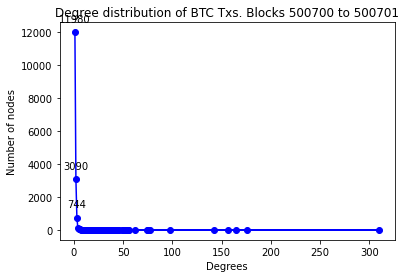

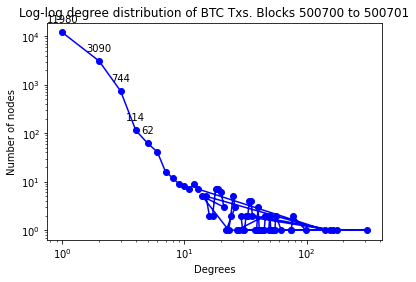

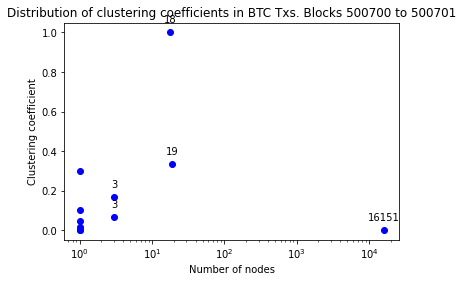

[('1N52wHoVR79PMDishab2XmRHsbekCdGquK', 310), ('17A16QmavnUfCW11DAApiJxp7ARnxN5pGX', 176), ('1NDyJtNTjmwk5xPNhjgAMu4HDHigtobu1s', 165), ('1PHQMMfEx6uZnRVxoCtXRopvnpzq9EiKSs', 156), ('bc1qwqdg6squsna38e46795at95yu9atm8azzmyvckulcc7kytlcckxswvvzej', 142), ('34xTUaVrrxeEhxVLfFjarQ97U81vqcRKyR', 98), ('3NwYSajGLTTzKCB1T34DjiWvfza6dR66wA', 77), ('12DdmN1y5enL72sN93sisUWQdT1gfF24qj', 77), ('1ENVTkd9f5KUkvcKSutiJwdBVPgaPh6ihT', 75), ('1P9RQEr2XeE3PEb44ZE35sfZRRW1JHU8qx', 74), ('3LaNNTg87XjTtXAqs55WV5DyWASEZizCXZ', 62), ('3NaQQxJkwqVWknPPt8FLTcwsVmxmfe17oU', 56), ('1Q5djDcbVKiMCUB8gne66y7osYtoBHdC2R', 56), ('12nMzckBLo59eiwHKWq13hhSY2wfX3Cnd6', 55), ('3EQTzjaaL6J2bGeX21f9pU47BvtwcYzWuH', 53), ('1ch6cPihzbNKXckUxN9NcCjPfhUp74g8p', 52), ('1KQg8ZBA3SSEJRKCb9ByWLeEFaP1XgtwK8', 51), ('1LAnF8h3qMGx3TSwNUHVneBZUEpwE4gu3D', 50), ('16MmguvKfEwMUbVvepUc2RnThqVdiS4X23', 50), ('3Lizzir8doAuF62cgXM3MURXmaN5Tk8XbW', 49), ('3422VtS7UtCvXYxoXMVp6eZupR252z85oC', 46), ('1MX5TG7GBJYZfuo6aouQP8Gmiu4AhAJN6t', 46),

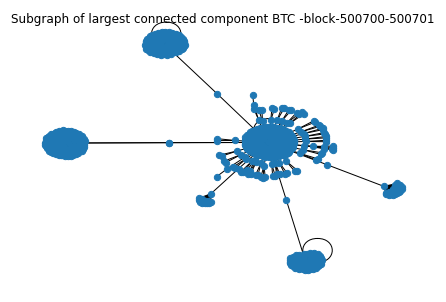

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import os.path
#import pygraphviz

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

        

def plot_deg_dist(G,outputfilepdf,outputfilepdflog,outputfilepdfclus,instrument, block1, block2):
	degrees = G.degree()
	all_degrees = [v for k, v in degrees]
	unique_degrees= list(set(all_degrees))
	count_of_degrees= []
	for i in unique_degrees:
		x= all_degrees.count(i)
		count_of_degrees.append(x)
	plt.plot(unique_degrees, count_of_degrees,'bo-')
	#plt.loglog(unique_degrees, count_of_degrees,'bo-')
	plt.xlabel('Degrees')
	plt.ylabel('Number of nodes')
	plt.title('Degree distribution of '+instrument+ ' Txs. Blocks ' + block1 +' to '+ block2)
	for x,y in zip(unique_degrees,count_of_degrees):
		label = "{0:}".format(y)
		if y > 150:	    
	  		plt.annotate(label, # this is the text
	                 (x,y), # this is the point to label
	                 textcoords="offset points", # how to position the text
	                 xytext=(0,10), # distance from text to points (x,y)
	                 ha='center') # horizontal alignment can be left, right or center

	plt.savefig(outputfilepdf)
	plt.show()

	degrees = G.degree()
	all_degrees = [v for k, v in degrees]
	unique_degrees= list(set(all_degrees))
	count_of_degrees= []
	for i in unique_degrees:
		x= all_degrees.count(i)
		count_of_degrees.append(x)
	plt.loglog(unique_degrees, count_of_degrees,'bo-')
	plt.xlabel('Degrees')
	plt.ylabel('Number of nodes')
	plt.title('Log-log degree distribution of '+instrument+ ' Txs. Blocks ' + block1 +' to '+ block2)
	for x,y in zip(unique_degrees,count_of_degrees):
		label = "{0:}".format(y)
		if y > 50:	    
	  		plt.annotate(label, # this is the text
	                 (x,y), # this is the point to label
	                 textcoords="offset points", # how to position the text
	                 xytext=(0,10), # distance from text to points (x,y)
	                 ha='center') # horizontal alignment can be left, right or center

	plt.savefig(outputfilepdflog)
	plt.show()

#-------------
	clusters = nx.clustering(G).items()
	all_clusters = [v for k, v in clusters]
	unique_clusters= list(set(all_clusters))
	count_of_clusters= []
	for i in unique_clusters:
		x= all_clusters.count(i) 
		count_of_clusters.append(x)
	plt.plot(count_of_clusters,unique_clusters,'bo')
	plt.xscale('log')
	plt.ylabel('Clustering coefficient')
	plt.xlabel('Number of nodes')
	plt.title('Distribution of clustering coefficients in '+instrument+ ' Txs. Blocks ' + block1 +' to '+ block2)
	for x,y in zip(count_of_clusters,unique_clusters):
		label = "{0:}".format(x)
		if x > 2:	    
	  		plt.annotate(label, # this is the text
	                 (x,y), # this is the point to label
	                 textcoords="offset points", # how to position the text
	                 xytext=(0,10), # distance from text to points (x,y)
	                 ha='center') # horizontal alignment can be left, right or center
	plt.savefig(outputfilepdfclus)
	plt.show()
#-------------

cwd= os.getcwd()
destdir = "outcome" 
#completeNamed = os.path.join(cwd, destdir)
dataset_file_name = input('Name of the file containing the dataset: by default block-629000-629002-transaction-history-to-analyse.txt') or "block-629000-629002-transaction-history-to-analyse.txt"
cryptotype = input('BTC or ETH? [by default BTC]:') or "BTC"
first_block_number = input('Number of initial block? [by default 629000]:') or "629000"
last_block_number = input('Number of last block file? [by default 629002]:') or "629002"
completeinputfiled = os.path.join(cwd, destdir)
dataset_file_named = os.path.join(completeinputfiled, dataset_file_name)
output_graph_info= cryptotype+"-block-" + first_block_number +"-"+ last_block_number + "-output-graph-info.txt"
output_graph_infoc= os.path.join(completeinputfiled, output_graph_info)
graph_file= cryptotype+"-degree_distribution_" + dataset_file_name + ".jpg"
graph_filec= os.path.join(completeinputfiled, graph_file)
graph_filelog= cryptotype+"-log-log-degree_distribution_" + dataset_file_name + ".jpg"
graph_filelogc= os.path.join(completeinputfiled, graph_filelog)
graph_fileclus= cryptotype+"-clustering_coef_distribution_" + dataset_file_name + ".jpg"
graph_fileclusc= os.path.join(completeinputfiled, graph_fileclus)
graph_filesubg= cryptotype+"-subgraph-largest-connected-component" + dataset_file_name + ".png"
graph_filesubgc= os.path.join(completeinputfiled, graph_filesubg)



if not os.path.exists(destdir):
	os.mkdir(destdir)
else:
	pass

G = nx.read_edgelist(dataset_file_named,comments='#', delimiter=' ')
G.name = cryptotype+"-block-" + first_block_number +"-"+ last_block_number+"-Tx-network"
print("network info")
print(nx.info(G))
print("number of nodes ")
print(nx.number_of_nodes(G))
print("number of edges ")
print(nx.number_of_edges(G))
print("is directed? ")
print(nx.is_directed(G))
print("degree per node ")
print(nx.degree(G))
degrees = G.degree()
degree_values = [v for k, v in degrees]
print(degree_values)
unique_degree_values = list(set(degree_values))
print(unique_degree_values)
#nx.draw(G)
#nx.draw_circular(G) #different layouts
#plt.show()
plot_deg_dist(G, graph_filec,graph_filelogc,graph_fileclusc, cryptotype, first_block_number, last_block_number)


with open(output_graph_infoc, 'w') as outdatafile:
	outdatafile.write("Cryptotype: "+ cryptotype)
	outdatafile.write("\n")
	outdatafile.write("Block numbers:" + first_block_number +"-"+ last_block_number)
	outdatafile.write("\n")
	outdatafile.write(nx.info(G))
	outdatafile.write("\n")
	outdatafile.write("Average clustering:")
	outdatafile.write (str(nx.average_clustering(G)))
	outdatafile.write("\n")
	outdatafile.write("Density:")
	outdatafile.write (str(nx.density(G)))
	outdatafile.write("\n")
	outdatafile.write("Degree assortativity:")
	outdatafile.write (str(nx.degree_assortativity_coefficient(G)))
	outdatafile.write("\n")


#	major = sorted(G.degree, key=lambda x: x[0], reverse=True)
	major = sorted(G.degree, key=lambda x: x[1], reverse=True)
#	G2 = nx.ego_graph(G,major[0],radius=3, center=True, undirected=True, distance=None)
	print(major)
	print(major[0][0])
	G2 = nx.ego_graph(G,major[0][0],radius=3, center=True, undirected=True)
	from networkx.drawing.nx_agraph import graphviz_layout
#	nx.draw(G2, pos=graphviz_layout(G2))
	nx.draw(G2, node_size=40)
	plt.suptitle('Subgraph of largest connected component '+cryptotype+' -block-' + first_block_number +'-'+ last_block_number )
	plt.savefig(graph_filesubgc)
	plt.show()




	if nx.is_connected(G):
		outdatafile.write("Graph is connected")
		outdatafile.write("Diameter:")
		outdatafile.write (str(nx.diameter(G)))
		outdatafile.write("\n")
	else:
		outdatafile.write("Graph is not connected. Diameter calculation not possible")
		#outdatafile.write("\n")
		component=0
		for g in connected_component_subgraphs(G): 
			component+=1
			#outdatafile.write("\n")
			#outdatafile.write("Shortest path length per component:")
			#outdatafile.write(str(nx.average_shortest_path_length(g))) 
			#outdatafile.write("\n")
			#outdatafile.write("Diameter per component:")
			#outdatafile.write(str(nx.diameter(g))) 
			#outdatafile.write("\n")
			##outdatafile.write("Eccentricity per component:")
			##outdatafile.write(str(nx.eccentricity(g))) 
			#outdatafile.write("\n")
		outdatafile.write("\n")
		outdatafile.write("Number of components in this network: "+ str(component))